## Списки

Вам дан список. Поменяйте порядок следования каждого чётного элемента во второй половине списка. 

In [32]:
n = 11
l = list(range(n))
l[n//2+1::2] = l[-((n%2==0)+1):n//2:-2] 
l

[0, 1, 2, 3, 4, 5, 10, 7, 8, 9, 6]

Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца. 

In [57]:
n = 10
l = list(range(n))
l[2:6:2], l[-(5+n%2):-2:2] = l[-(5+n%2):-2:2], l[2:6:2]
l


[0, 1, 5, 3, 7, 2, 6, 4, 8, 9]

## Генераторы

Вам дан список. Создайте новый список, в котором элементы будут уменьшены

In [60]:
n = 10
l = list(range(n))
l = [x/10 for x in l]
l

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Вам дан список. Создайте новый список, в котором будут чётные элементы возведены в квадрат, а нечётные в куб.

In [63]:
n = 10
l = list(range(n))
l = [x**2 if x%2==0 else x**3 for x in l]
l

[0, 1, 4, 27, 16, 125, 36, 343, 64, 729]

## Встроенные функции

Вам дана строка. Выведите ascii-код минимального элемента в строке. 

In [182]:
s = 'dasdfasfgshdslsjksdjkl;sdj'
ord(min(x for x in set(s)))
ord(min(s))

59

Вам дана строка. Выведите строку, символы которой будут смещены по ascii на порядковый номер элемента.

In [69]:
s = 'dasdfasfgshdslsjksdjkl;sdj'
new_s = []
for x in s:
  new_s.append(chr(ord(x)+1))

"".join(new_s)

'ebtegbtghtietmtklteklm<tek'

## NumPy

In [70]:
import numpy as np

Дан массив 16х16
Создайте новый массив 4х4 , элементы которого будут суммой блоков 4х4 исходного массива

In [73]:
arr = np.random.randint(-10, 10, (16, 16))
new_arr = np.empty((4, 4), dtype=int)
for x in range(len(arr)//4):
  for y in range(len(arr)//4):
    new_arr[x, y] = arr[x*4:x*4+4, y*4:y*4+4].sum()
new_arr

array([[-33, -35, -11,  11],
       [  7,   3, -21,  -1],
       [-24,   3, -13,  -1],
       [-10,  -1, -20,  16]])

Даны линии и точка

Расчитайте расстояние от точки до каждой прямой, найдите ближащую.

In [76]:
def dist(l1, l2, a):
  q = l2 - l1
  p = l1 - a
  return abs(np.cross(p, q))/np.linalg.norm(q)

lines = np.random.randint(-10, 10, (10, 2, 2))
point = np.array([1, 2])

dists = [] 

for line in lines:
  dists.append(dist(line[0], line[1], point))

dists = np.array(dists)

lines[dists.argmin()]



array([[ 1,  0],
       [ 5, -7]])

In [77]:
dists

array([4.9858206 , 6.04487721, 1.10940039, 7.74707954, 5.        ,
       3.82009207, 0.99227788, 5.34739138, 6.95718614, 1.27279221])

## Pandas

https://www.kaggle.com/datasets/blurredmachine/hackerearth-employee-attrition?select=Train.csv

- Какие типы данных присутствуют в датасете?
- Есть ли в датасете пропущенные значения? Если да, то сколько и где?
- Постройте распределения переменной `Attrition_rate`.
- Постройте heatmap для матрицы корреляции числовых переменных в датасете.
- Постройте pairplot для всех переменных
- Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
- Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке `Relationship_Status` *(т.е. отдельно какие показатели у класса Marries, какие у класса Single)*.
- Постройте гистаграмму для переменной `Unit` и найдите по ней самую популярную профессию.
- Найдите сколько замужних/женатых людей у самой популярной профессии имеют `Attrition_rate` выше среднего.

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('Train.csv')

In [183]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# Какие типы данных присутствуют в датасете?

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [179]:
set(df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

# Есть ли в датасете пропущенные значения? Если да, то сколько и где?

In [92]:
df.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

# Постройте распределения переменной Attrition_rate

Text(0.5, 1.0, 'Attrition_rate Hist')

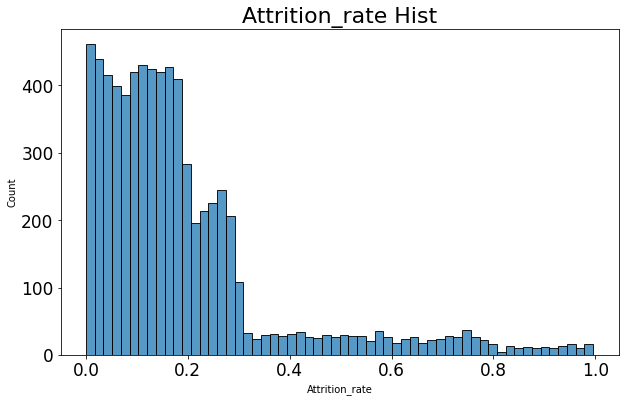

In [111]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Attrition_rate'])

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.title("Attrition_rate Hist", fontsize=22)

# Постройте heatmap для матрицы корреляции числовых переменных в датасете.

Text(0.5, 1.0, 'Corr matrix')

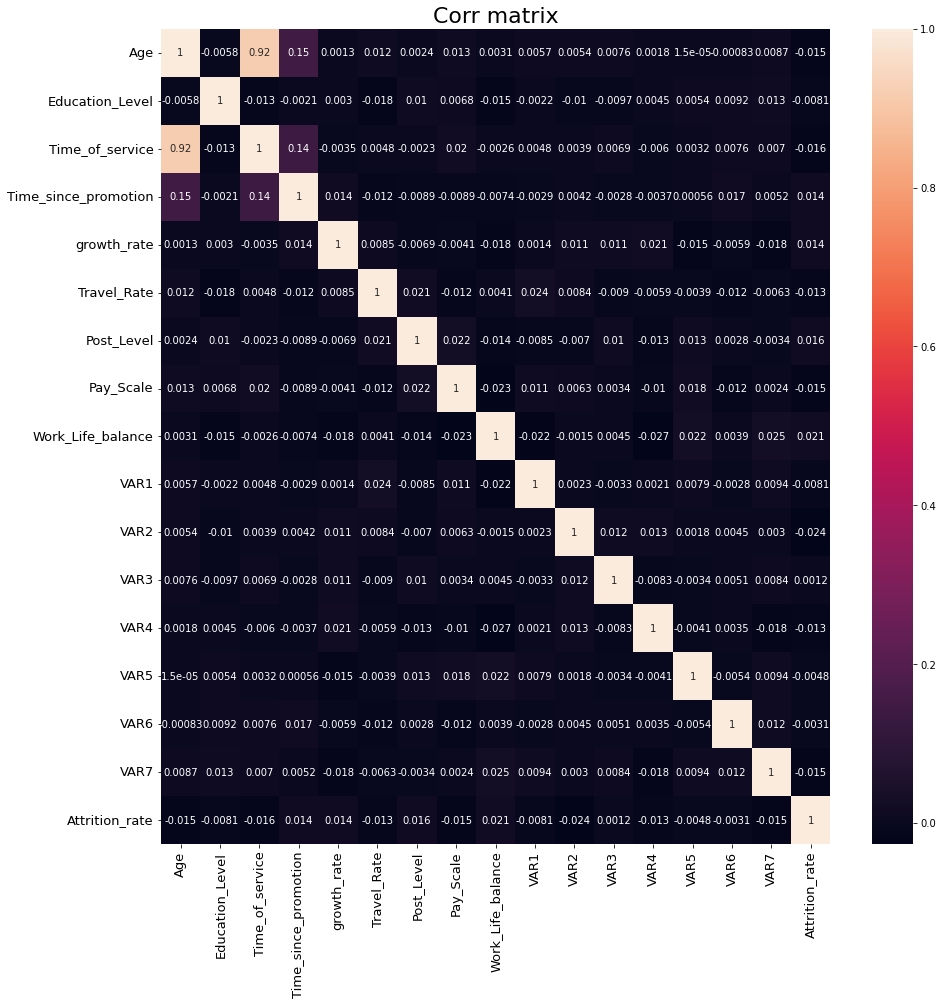

In [108]:
plt.figure(figsize=(15, 15))
sns.heatmap(
      df[df.select_dtypes(include=np.number).columns].corr(),
      annot=True
    )

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Corr matrix", fontsize=22)

# Постройте pairplot для всех переменных

Text(0.5, 1.0, 'Pairplot')

<Figure size 1080x1080 with 0 Axes>

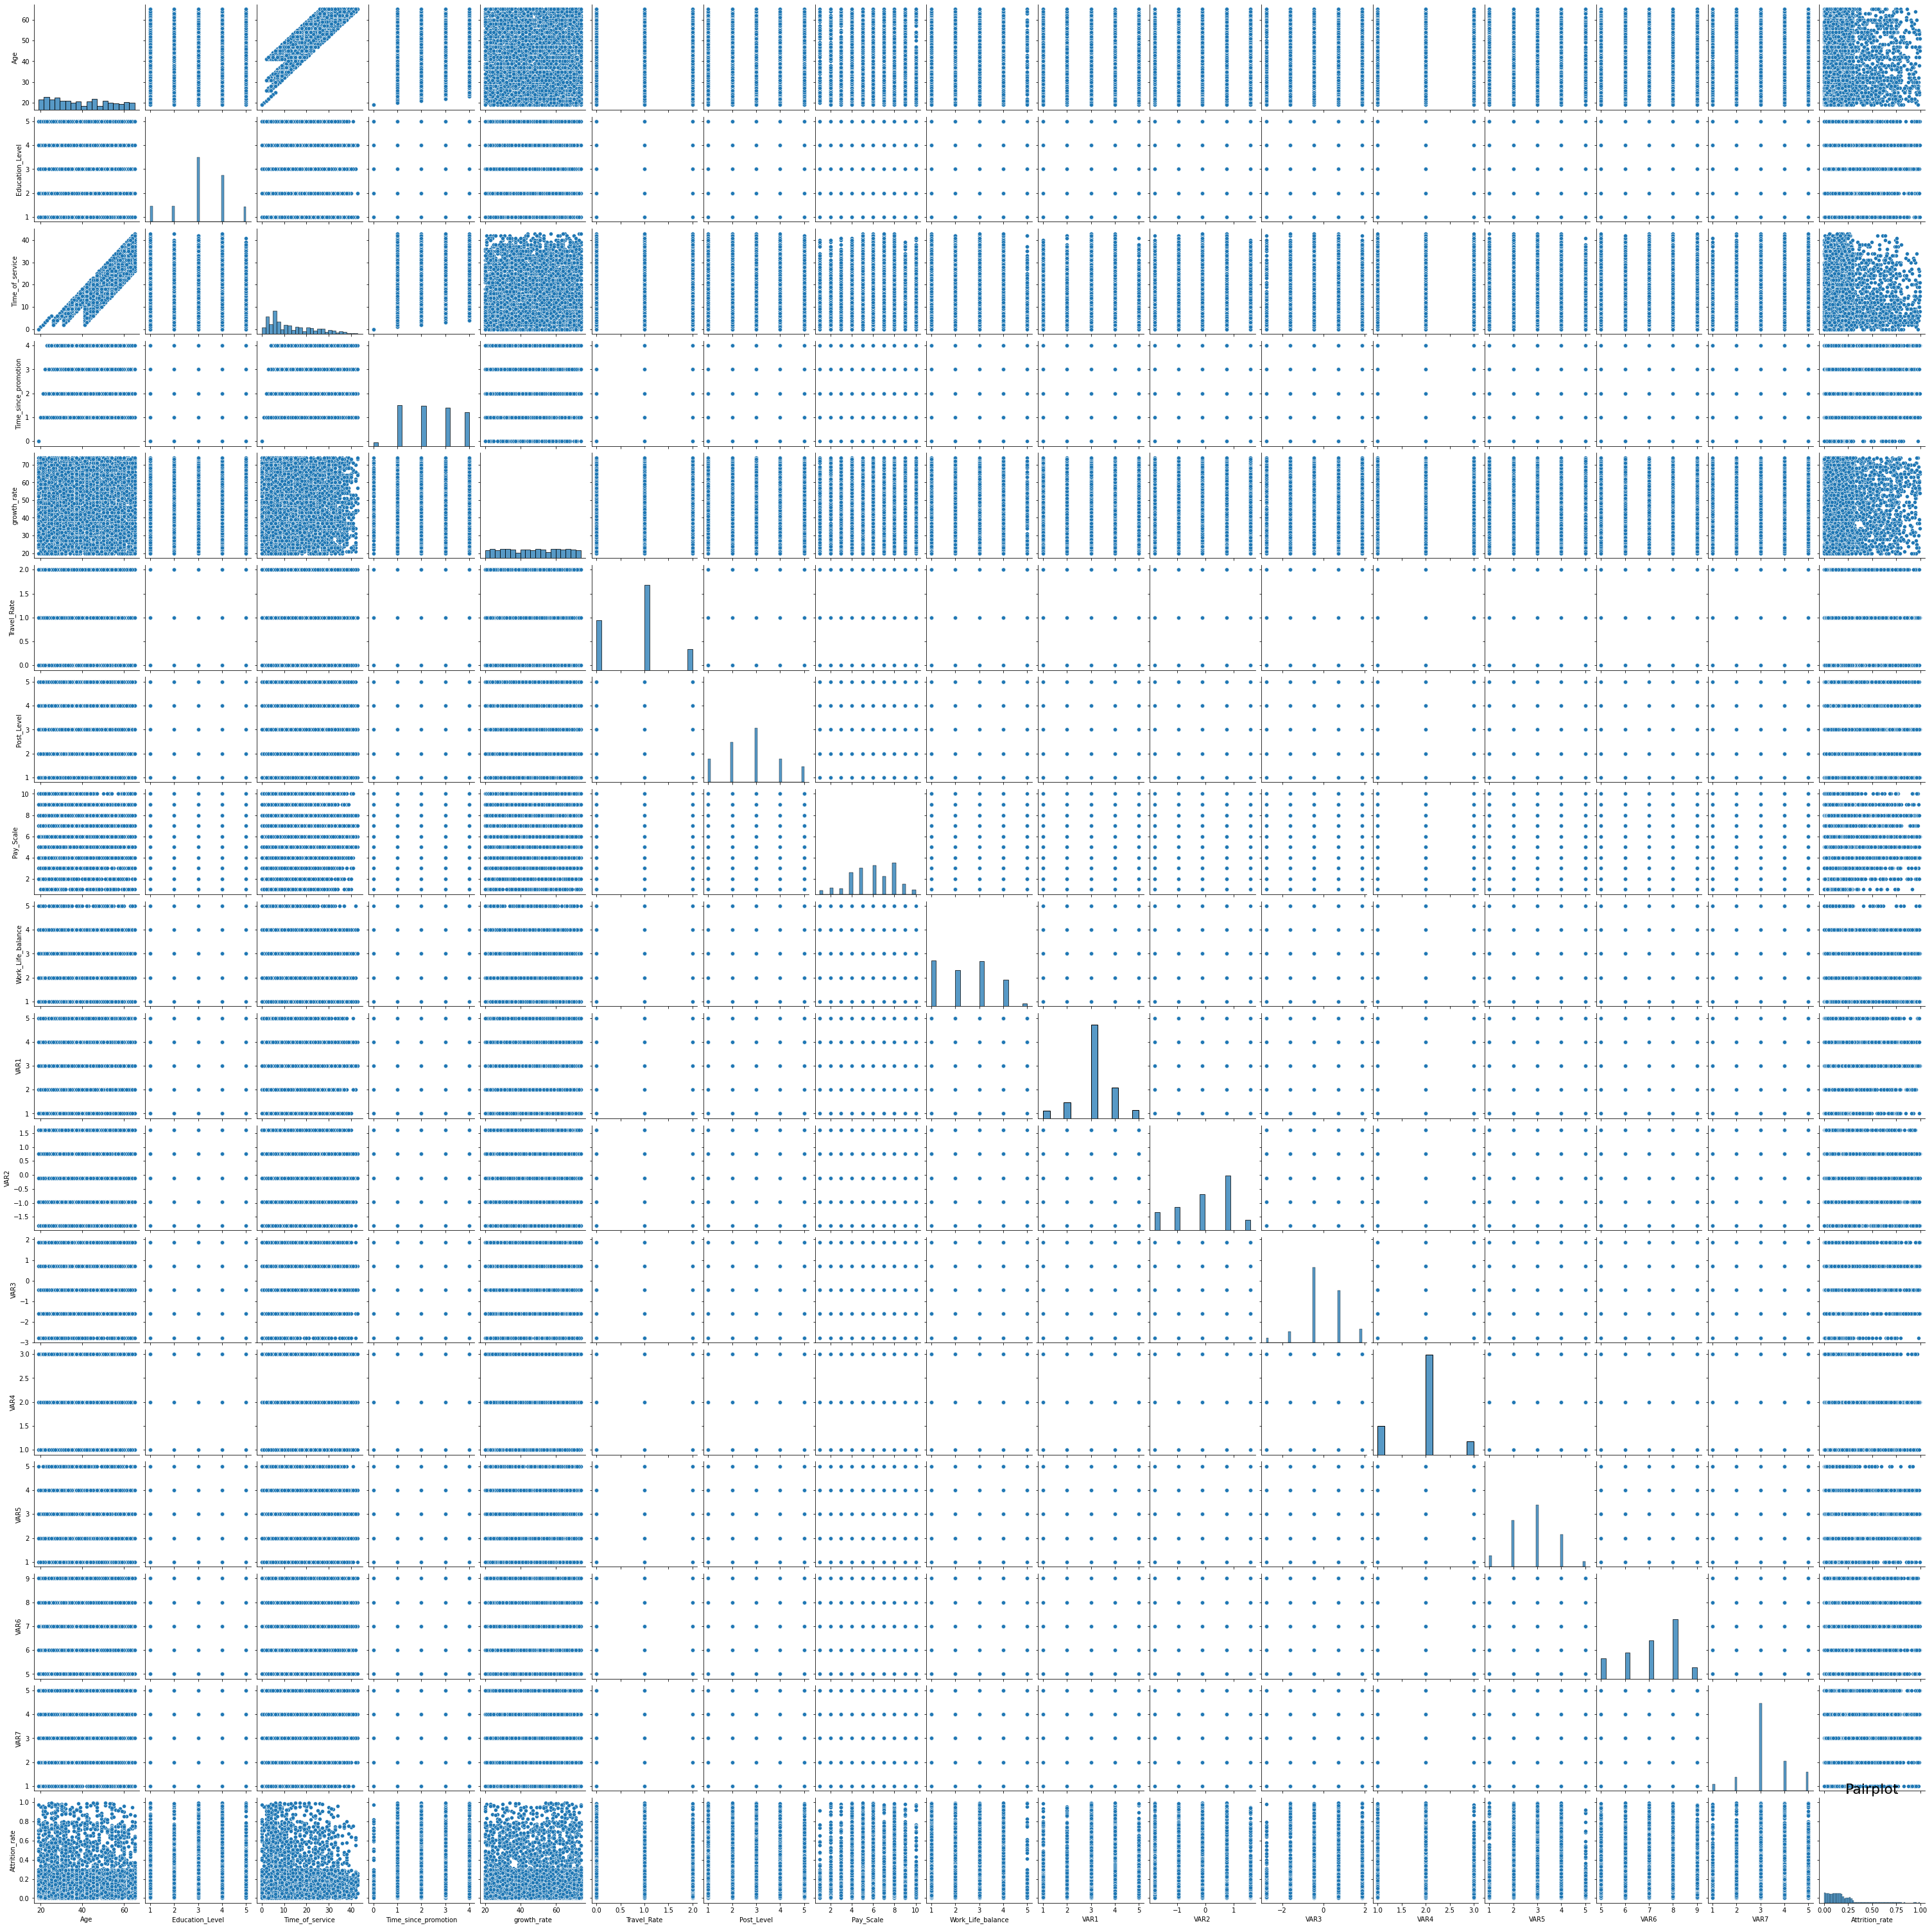

In [157]:
plt.figure(figsize=(15, 15))
sns.pairplot(df)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Pairplot", fontsize=22)

# Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).

Text(0.5, 1.0, 'Boxplot')

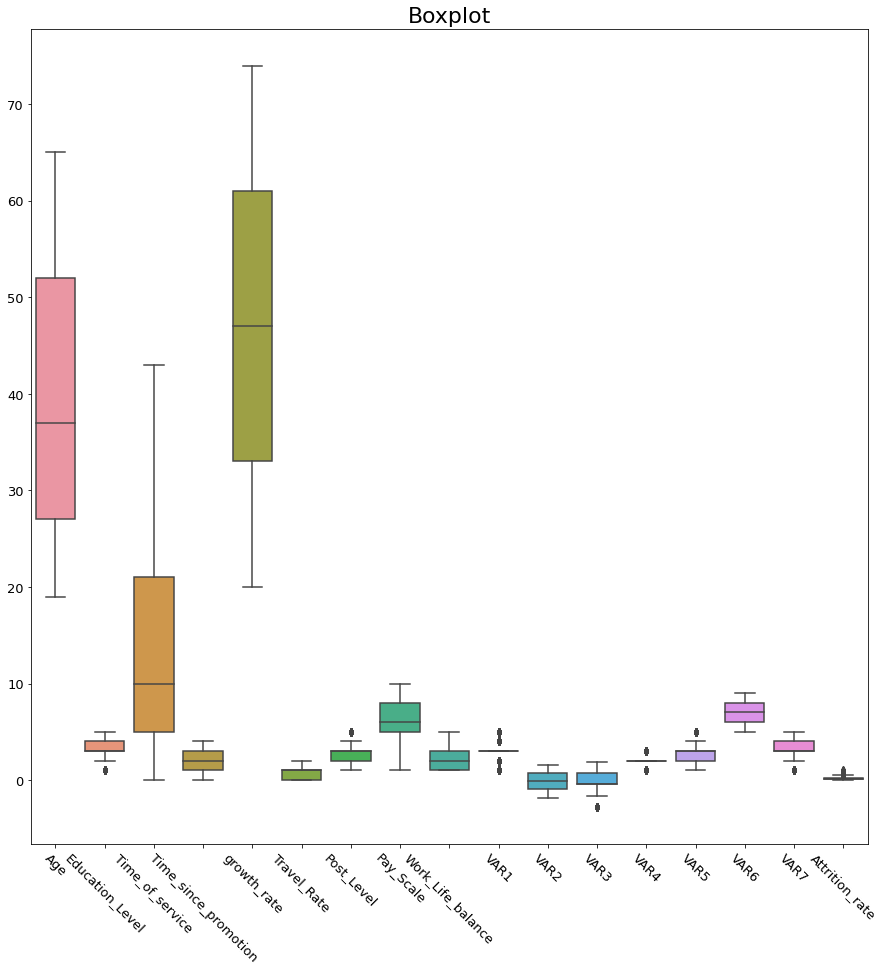

In [155]:
plt.figure(figsize=(15, 15))
sns.boxplot(df)

plt.xticks(fontsize=13)
plt.xticks(rotation=-45)
plt.yticks(fontsize=13)
plt.title("Boxplot", fontsize=22)

In [167]:
def get_outl(df_col):
  q1 = df_col.quantile(0.25)
  q3 = df_col.quantile(0.75)
  iqr = q3-q1

  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  return (df_col > upper_bound) | (df_col < lower_bound)

In [176]:
for column in df.select_dtypes(include=np.number).columns:
  outl = get_outl(df[column])
  if outl.sum()>0:
    print(df[outl][column], '\n')


4       1
22      1
32      1
48      1
58      1
       ..
6979    1
6987    1
6989    1
6992    1
6996    1
Name: Education_Level, Length: 695, dtype: int64 

5       5
33      5
40      5
41      5
45      5
       ..
6969    5
6971    5
6977    5
6984    5
6998    5
Name: Post_Level, Length: 698, dtype: int64 

0       4
2       4
4       1
8       1
13      4
       ..
6994    4
6995    1
6996    2
6997    2
6998    4
Name: VAR1, Length: 2807, dtype: int64 

55     -2.7762
73     -2.7762
130    -2.7762
150    -2.7762
217    -2.7762
         ...  
6864   -2.7762
6927   -2.7762
6944   -2.7762
6989   -2.7762
6996   -2.7762
Name: VAR3, Length: 198, dtype: float64 

2       3.0
10      3.0
15      1.0
16      1.0
19      1.0
       ... 
6979    1.0
6986    1.0
6989    3.0
6990    3.0
6999    3.0
Name: VAR4, Length: 1853, dtype: float64 

8       5
12      5
17      5
40      5
61      5
       ..
6858    5
6868    5
6904    5
6954    5
6981    5
Name: VAR5, Length: 222, dtype: int64 



# Посчитайте различные статестические показатели (среднее, медиана, максимум, минимум) для различных категорий в колонке Relationship_Status (т.е. отдельно какие показатели у класса Marries, какие у класса Single).

In [131]:
df.groupby('Relationship_Status').aggregate(['sum', 'mean', 'median'])

<ipython-input-131-48effcf0e3d2>:1: FutureWarning: ['Employee_ID', 'Gender', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('Relationship_Status').aggregate(['sum', 'mean', 'median'])


Age                   Education_Level            \
                          sum       mean median             sum      mean   
Relationship_Status                                                         
Married              168608.0  39.644486   37.0           14411  3.188274   
Single                92427.0  39.583298   38.0            7904  3.187097   

                           Time_of_service                    \
                    median             sum       mean median   
Relationship_Status                                            
Married                3.0         59196.0  13.374605   10.0   
Single                 3.0         32572.0  13.404115   10.0   

                    Time_since_promotion  ...   VAR5   VAR6                   \
                                     sum  ... median    sum      mean median   
Relationship_Status                       ...                                  
Married                            10719  ...    3.0  32105  7.102876    7.0   
Single                              5851  ...    3.0  17604  7.098387    7.0   

                      VAR7                  Attrition_rate                     
                       sum      mean median            sum      mean   median  
Relationship_Status                                                            
Married              14659  3.243142    3.0       850.3169  0.188123  0.14155  
Single                8140  3.282258    3.0       475.3160  0.191660  0.14470  

[2 rows x 51 columns]

# Постройте гистаграмму для переменной Unit и найдите по ней самую популярную профессию.

Text(0.5, 1.0, 'Unit Histplot')

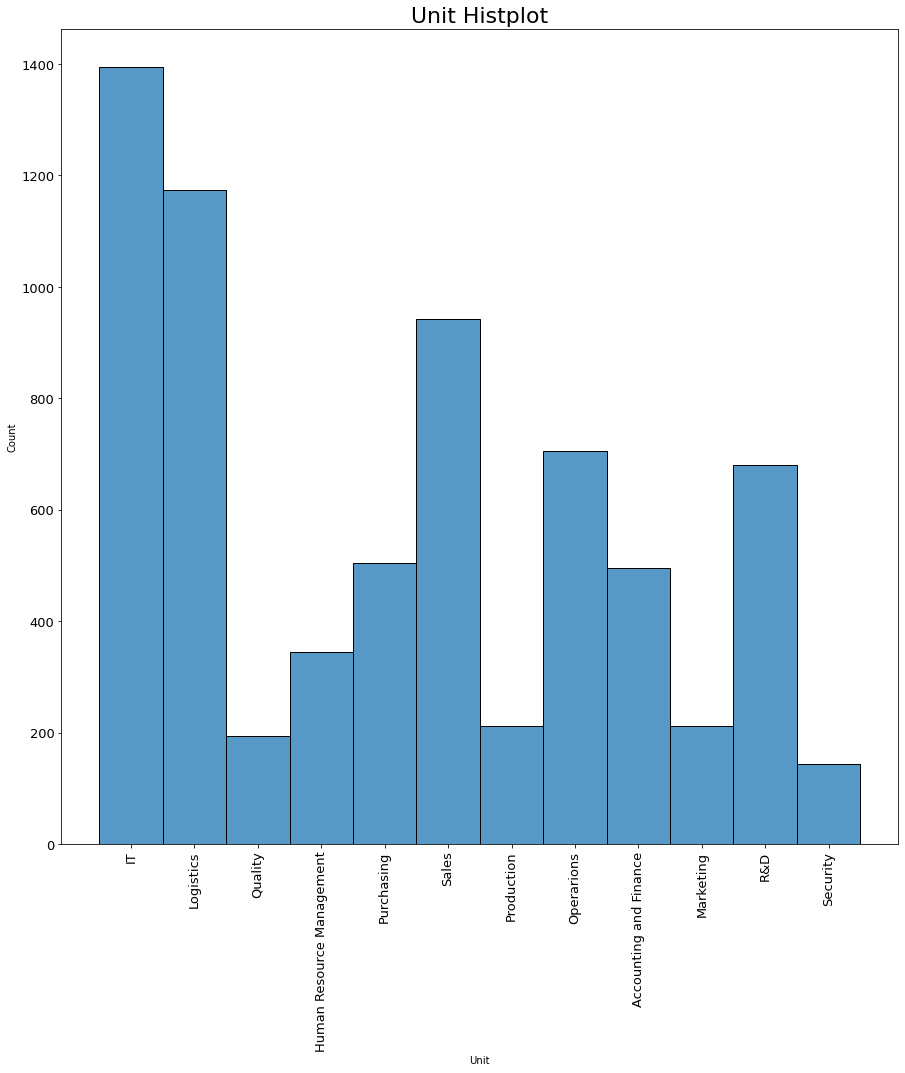

In [137]:
plt.figure(figsize=(15, 15))
sns.histplot(df['Unit'])

plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=13)
plt.title("Unit Histplot", fontsize=22)

# Найдите сколько замужних/женатых людей у самой популярной профессии имеют Attrition_rate выше среднего.

In [152]:
df_new = df[(df['Unit']=='IT') & (df['Attrition_rate'] > df['Attrition_rate'].mean())]

df_new['Relationship_Status'].value_counts()

Married    293
Single     162
Name: Relationship_Status, dtype: int64

In [184]:
df

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
6996,EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
6997,EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
6998,EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162


In [186]:
df['Unit'].astype('category').cat.codes.corr(df['Attrition_rate'])

0.02432445241182448